### Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

Data Dictionary for Market Segmentation:

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
# Import stats from scipy
from scipy import stats
from scipy.stats import zscore 
from sklearn.cluster import KMeans 


### Question 1.1) Read the data and do exploratory data analysis. Describe the data briefly.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.1:
    
### Performing Basic Data Exploration:
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of the dataset

**We will  be loading the given Data file using pandas.**
    


In [2]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


**Head function will tell the top records in the data set. By default python shows you only top 5 records.**

In [4]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 210 .
The number of columns of the dataframe is 7 .


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


**info() is being used to check the Information about the data and the data types of each respective attributes.**

**The following are the observation:**
- Total of 7 variables
- All are numeric variables
- There is no no missing value in the dataset

In [6]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

**There is no missing value in the dataset**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


### Checking for duplicate data :

In [8]:
df.duplicated().sum()

0

#### It shows that there is no duplicate data.

### Checking for Outliers

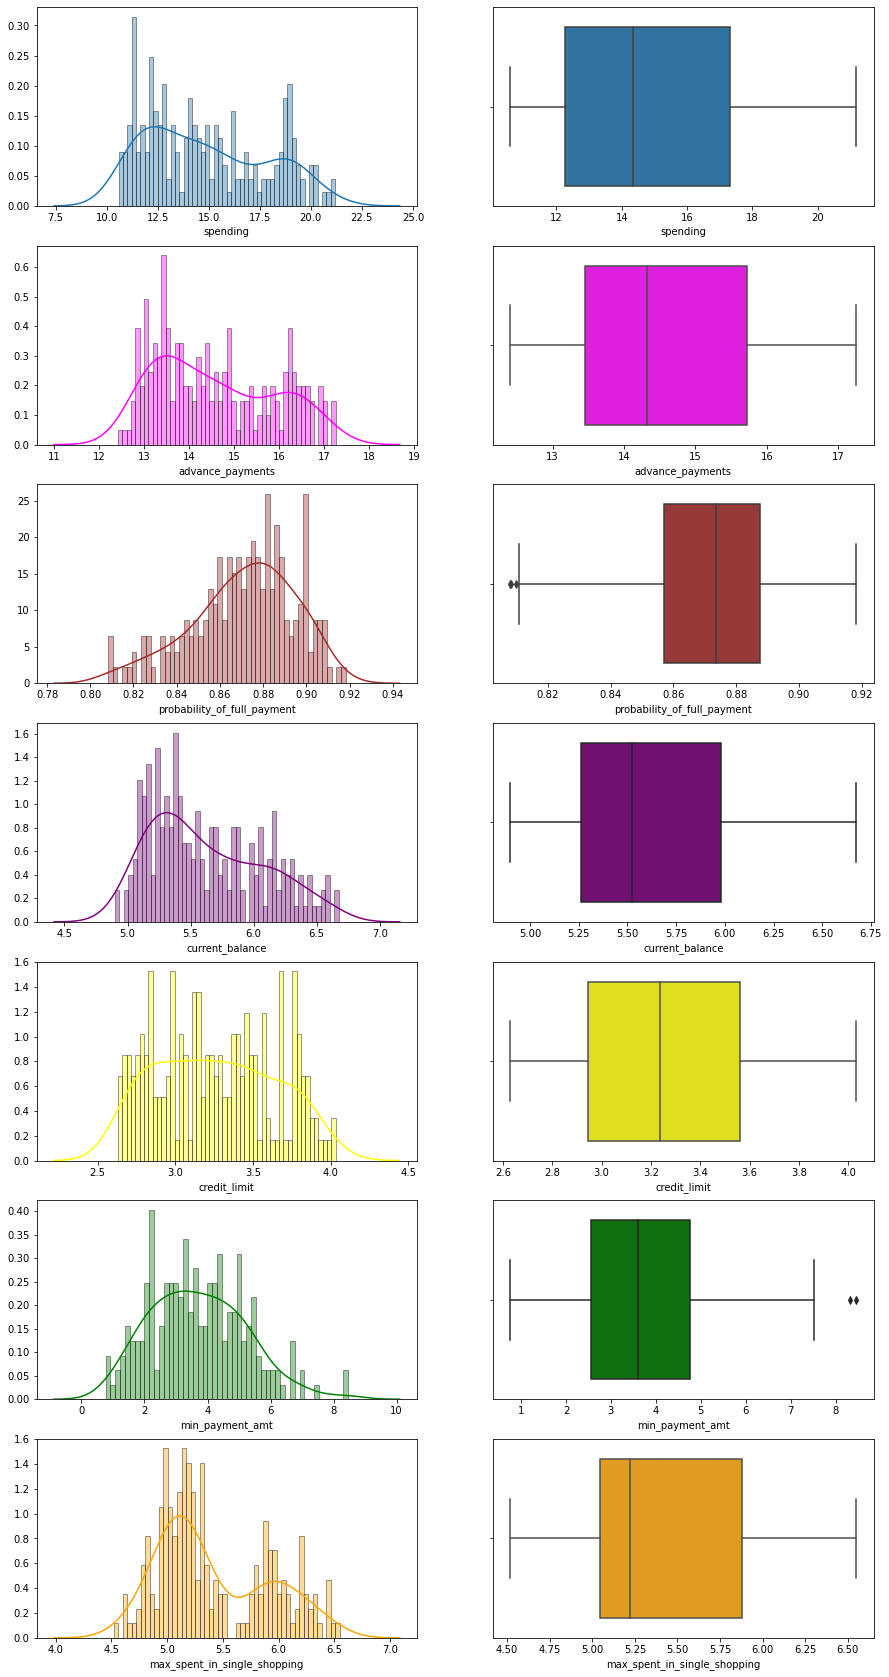

In [9]:
fig, axs=plt.subplots(nrows= 7, ncols= 2, figsize=(15,30))
sns.distplot(df['spending'], bins= 50, hist_kws=dict(ec='black'), ax=axs[0][0])
sns.distplot(df['advance_payments'], bins= 50, hist_kws=dict(ec='black'), ax=axs[1][0], color='magenta')
sns.distplot(df['probability_of_full_payment'], bins= 50, hist_kws=dict(ec='black'), ax=axs[2][0], color='brown')
sns.distplot(df['current_balance'], bins= 50, hist_kws=dict(ec='black'), ax=axs[3][0], color='purple')
sns.distplot(df['credit_limit'], bins= 50, hist_kws=dict(ec='black'), ax=axs[4][0], color='yellow')
sns.distplot(df['min_payment_amt'], bins= 50, hist_kws=dict(ec='black'), ax=axs[5][0], color='green')
sns.distplot(df['max_spent_in_single_shopping'], bins= 50, hist_kws=dict(ec='black'), ax=axs[6][0], color='orange')
sns.boxplot(df['spending'], ax=axs[0][1])
sns.boxplot(df['advance_payments'], ax=axs[1][1], color='magenta')
sns.boxplot(df['probability_of_full_payment'], ax=axs[2][1], color='brown')
sns.boxplot(df['current_balance'], ax=axs[3][1], color='purple')
sns.boxplot(df['credit_limit'], ax=axs[4][1], color='yellow')
sns.boxplot(df['min_payment_amt'], ax=axs[5][1], color='green')
sns.boxplot(df['max_spent_in_single_shopping'], ax=axs[6][1], color='orange')
plt.show()

#### There are no major outliers in the dataset. Though 'probability_of_full_payment' and 'min_payment_amt' has very few outliers, we will not treat those outliers for further analysis.

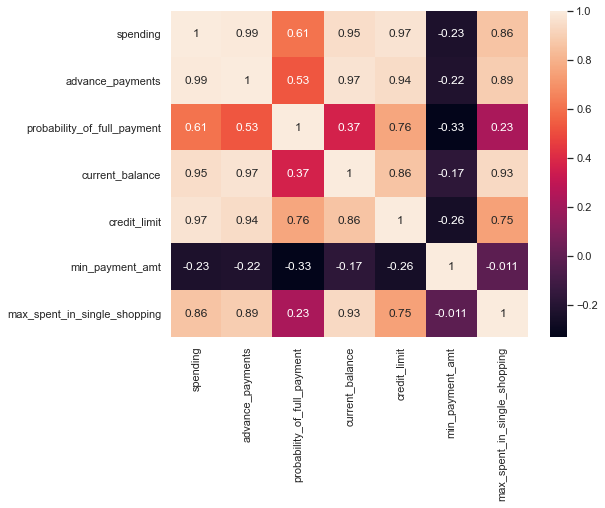

In [10]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True)
plt.show()

**The following are the observation from basic descriptive stats:**
- All the distributions are either slightly skewed or bimodal.
- There are no major outliers in the dataset. Though 'probability_of_full_payment' and 'min_payment_amt' has very few outliers, we will not treat those outliers for further analysis.
- There is no duplicate data.
- There is no missing value in the dataset.
- There are many highly correlated variable pairs like 'spending & advance_payments' or 'current_balance & credit_limit'. This may lead to multicollinearity. As of now, we are not treating the multicollinearity. Moreover, multicollinearity generally doesn't impact the clustering process.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">------------------------------------------------------------------------------------------------------------------------------------------

### Question 1.2)  Do you think scaling is necessary for clustering in this case? Justify.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.2:

When working with data where each variable has different scales or unit of measurements (e.g., age and yearly income has different units), we cannot compare those fields. All distance based clustering algorithms are affected by the scale of the variables since, clustering techniques use Euclidean Distance, Squared Euclidean Distance, Manhattan Distance etc. to form the cohorts. 
So, logically, the algorithms should not be be affected by the magnitude of these variables or in other words, algorithm should not be biased towards variables with higher magnitude. To overcome this problem, all the variables are brought down to the same scale. One of the most common technique to do so is normalization where we calculate the mean and standard deviation of the variable. 



In [11]:
scaled_df = df.apply(zscore)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">------------------------------------------------------------------------------------------------------------------------------------------

### Question 1.3) Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.3:

## Creating the Dendrogram

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

#### We will use Ward's linkage method. It is possible that the same set of observations may be clustered in different partitions based on the choice of distance and linkage method.

In [13]:
HClust = linkage(scaled_df, method = 'ward')

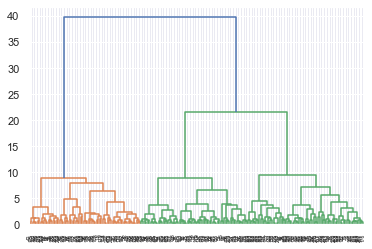

In [14]:
dend = dendrogram(HClust)

#### So, from the dendogram it is observed that there are 2 final clusters formed from the dataset. Based on the height at which the clusters are merged, we will start with 3 clusters for further analysis and analyze the clustered dataset adding more clusters if required. Moreover, beyond 3 clusters, the distances (heights) are not so considerably high leading to less heterogeneity or more homogeneity among the clusters. Plotting below a truncated dendrogram with the last 3 clusters.

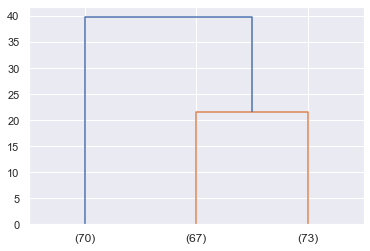

In [15]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 3, # the last 3 merges
                 )

#### We can extract the cluster labels using the fcluster method. Also Identifying the number of clusters considered based on the dendrogram and add the cluster numbers to the original dataframe.

In [16]:
from scipy.cluster.hierarchy import fcluster

In [17]:
# Method 1 - Defining the max cluster number
clusters_1 = fcluster(HClust, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [18]:
# Method 2 - 

clusters_2 = fcluster(HClust, 10, criterion='distance')
clusters_2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

#### Adding a new variable 'cluster' to the original dataframe to identify the corresponding clusters and observation.

In [19]:
df['Clusters'] = clusters_1

In [20]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Cluster Frequency

In [21]:
df.Clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: Clusters, dtype: int64

### Cluster Profiling

In [22]:
clustered_data=df.groupby('Clusters').mean()
clustered_data['Freq']=df.Clusters.value_counts().sort_index()
clustered_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Using Agglomerative Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(scaled_df)
print(Cluster_agglo)



[1 0 1 2 1 0 2 2 1 2 1 1 2 1 0 0 0 2 2 2 2 2 1 2 0 1 0 2 2 2 2 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 1 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 1 1 1 1 0 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 1
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 2 2 1 2
 0 2 0 2 0 1 0 0 2 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 2 0 0 1
 1 0 1 0 2 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 1]


In [24]:
df["Agglo_CLusters"]=Cluster_agglo
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters,Agglo_CLusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


### Cluster Profiling

In [25]:
agglo_data=df.drop(["Clusters"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70


#### So, from both Dendogram and Agglomerative Clustering method, it is observed that both are yielding similar results in clustering, even though the number of observations per cluster vary a little. Clusters 1, 2 and 3 in Dendogram corresponds to 1, 2 and 0 in Agglomerative respectively. Finally, we will refer Dendogram clusters only for the profiling and recommendation given as below,

1. Cluster 1 customers have higher spending power and belongs to high net worth individual group. This observation is concluded based on high 'spending', 'advance_payments', 'credit_limit' , 'max_spent_in_single_shopping' values.

2. Cluster 2 has lower 'spending' value among the 3 clusters. They also have lowest 'credit_limit, but highest 'min_payment_amt'. So, we can assume this category of customers to be 'Low Risk' customer for the bank. 

3. Cluster 3 has moderate 'spending', 'current_balance' and 'credit_limit'. But it has 'min_payment_amt' which is a bit risky for the bank. 

Overall cluster 2 and 3 have similar traits except 'spending' and 'min_payment_amt'. One probable difference between cluster 2 and 3 may be the age group, where cluster 3 points to a young customer group. Due to age difference, their credit card handling behaviour is also different.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">---------------------------------------------------------------------------------------------------------------------------------------

### Question 1.4) Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.4:



## Creating Clusters using KMeans

### Initially forming 3 Clusters with K=3. This clue has been taken from Dendogram and also logical conclusion for not going with just 2 clusters.


In [26]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 3,random_state=1)

# Fit K means on the scaled_df
k_means.fit(scaled_df)

# Get the labels
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

### Forming clusters with K =1,2,3,4,5,6,7,8,9 and comparing the WSS (Within Sum of Squares) and plotting it.

In [27]:
wss =[]
for i in range(1,10):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725]

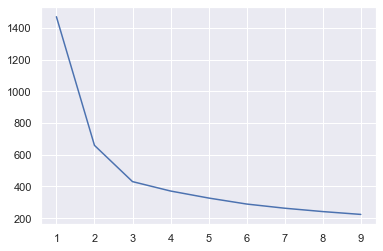

In [28]:
a=[1,2,3,4,5,6,7,8,9]
plt.plot(range(1,10), wss)

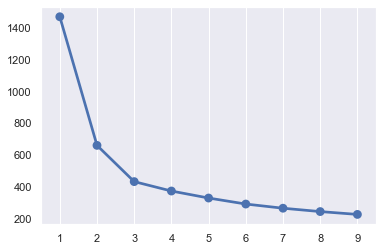

In [29]:
sns.pointplot(a, wss)
plt.grid(which='Both',axis='both')
plt.show()

### So, from the above WSS plot, it is observed that the WSS score becomes almost flat after cluster 3, which denotes that 3 clusters can be an optimum number in this classification. Moreover, we can verify this with the help of Silhouette score. Below are the labels for KMeans with 2 & 3 clusters.

### Cluster evaluation for 2 clusters: the silhouette score

In [30]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score
print("The silhouette score for K=2 is", silhouette_score(scaled_df,labels,random_state=1))
print("The silhouette sample mean is ", silhouette_samples(scaled_df,labels).min())

The silhouette score for K=2 is 0.46577247686580914
The silhouette sample mean is  -0.006171238927461077


### Cluster evaluation for 3 clusters: the silhouette score

In [32]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
labels
from sklearn.metrics import silhouette_samples, silhouette_score
print("The silhouette score for K=3 is", silhouette_score(scaled_df,labels,random_state=1))
print("The silhouette sample mean is ", silhouette_samples(scaled_df,labels).min())

The silhouette score for K=3 is 0.4007270552751299
The silhouette sample mean is  0.002713089347678533


### Cluster evaluation for 4 clusters: the silhouette score

In [33]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
labels
from sklearn.metrics import silhouette_samples, silhouette_score
print("The silhouette score for K=4 is", silhouette_score(scaled_df,labels,random_state=1))
print("The silhouette sample mean is ", silhouette_samples(scaled_df,labels).min())

The silhouette score for K=4 is 0.3276547677266193
The silhouette sample mean is  -0.05384082699360035


### So, it is seen that silhouette score is better for 2 clusters than for 3 clusters. But, with respect to business insights, it will be better to have 3 clusters in minimum. Moreover, silhouette score for 4 cluster is less than the cluster 3 and has a -ve sample mean. So, we will go ahead with 3 clusters for further analysis and recommendation.

### Appending Kmeans Clusters to the original dataset.

In [34]:
# recalculating labels for 3 clusters 
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
labels
df["Cluster_kmeans"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters,Agglo_CLusters,Cluster_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,2


### K-means Cluster Profiling

In [35]:
Kmeans_data=df.drop(["Clusters","Agglo_CLusters"],axis=1).groupby('Cluster_kmeans').mean()
Kmeans_data['Freq']=df.Cluster_kmeans.value_counts().sort_index()
Kmeans_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Cluster_kmeans,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">------------------------------------------------------------------------------------------------------------------------------------------

### Question 1.5) Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.5:

### Below are the cluster profiles for Dendogram, Agglomerative and KMeans clustering.

In [36]:
print("Dendogram")
clustered_data



Dendogram


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [37]:
print("Agglomerative")
agglo_data

Agglomerative


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70


In [38]:
print("K-Means")
Kmeans_data

K-Means


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Cluster_kmeans,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67


### Recommended different promotional strategies are in the final Report.